<a href="https://colab.research.google.com/github/rishi-29-02/Performing-Analysis-of-Meteorological-Data/blob/main/Weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Performing Analysis of Meteorological Data

Hypothesis to be tested : The Influence of Global Warming on temperature and humidity.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# load the dataset
#from google.colab import files
#uploaded = files.upload()

In [62]:
data = pd.read_csv('weatherHistory.csv')
data.head(8)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,Partly cloudy throughout the day.


In [63]:
data.shape

(96453, 11)

In [64]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [65]:
data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 02:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,NaN


From the describe we infer that the feature PrecipType has missing values.

In [66]:
# Changing the dtype of the Formatted Date to datetime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Formatted Date'].dtype

datetime64[ns, UTC]

In [67]:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [68]:
data['Precip Type'].isnull().value_counts()

False    95936
True       517
Name: Precip Type, dtype: int64

Thus, the feature Precip Type has 517 missing values.

Dropping all the instances having missing values.

In [69]:
data = data.dropna()

In [70]:
data.shape

(95936, 11)

In [71]:
# Number of distinct observations
data.nunique()

Formatted Date              95912
Summary                        27
Precip Type                     2
Temperature (C)              7573
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Pressure (millibars)         4971
Daily Summary                 214
dtype: int64

Therefore our dataset is ready for visualization.

# Given

**The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming"**

The H0 means we need to find whether the average Apparent temperature for the
month of a month say April starting from 2006 to 2016 and the average humidity for
the same period have increased or not. This monthly analysis has to be done for all 12
months over the 10 year period. So you are basically resampling your data from hourly
to monthly, then comparing the same month over the 10 year period.

In [72]:
data.set_index(data['Formatted Date'], inplace=True)
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


As we need only the two features 
1. Apparent Tempearture
2. Humidity

therefore creating a new data dataframe with these two features.

In [73]:
new_data = data[['Apparent Temperature (C)', 'Humidity']]
new_data.head(5)

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83


As we have to do the Monthwise analysis and therefore modifying the dataset.

In [74]:
new_data = new_data.resample('MS').mean() # MS = Month Starting
new_data.head(10)

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
2006-05-01 00:00:00+00:00,15.539479,0.721801
2006-06-01 00:00:00+00:00,19.535965,0.747125
2006-07-01 00:00:00+00:00,23.595348,0.656304
2006-08-01 00:00:00+00:00,19.528241,0.760753


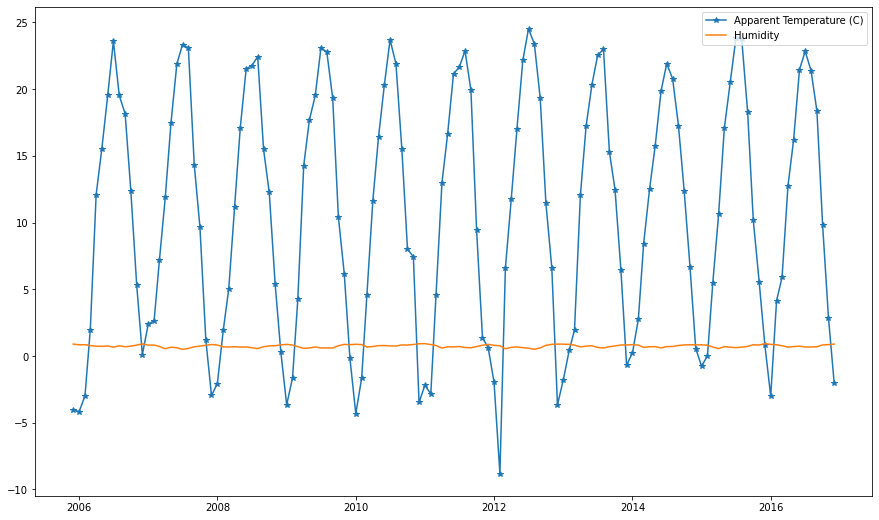

In [75]:
plt.figure(figsize=(15, 9))
plt.plot(new_data['Apparent Temperature (C)'], label='Apparent Temperature (C)', marker='*')
plt.plot(new_data['Humidity'], label='Humidity')
plt.legend(loc='upper right')
plt.show()

From the above plot, we infer that the humidity remains constant throughout the period from 2006 to 2016.

Now we are going to compare the same month over the period of 10 years.

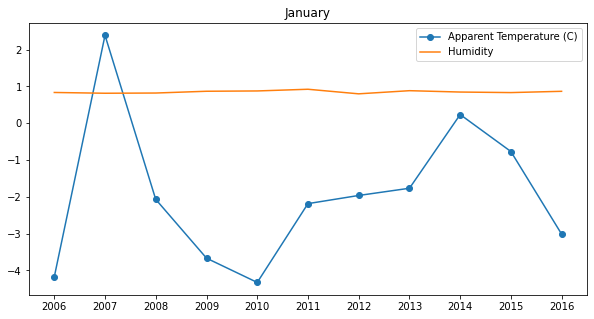

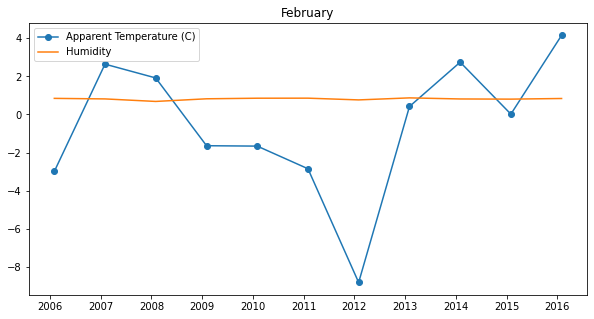

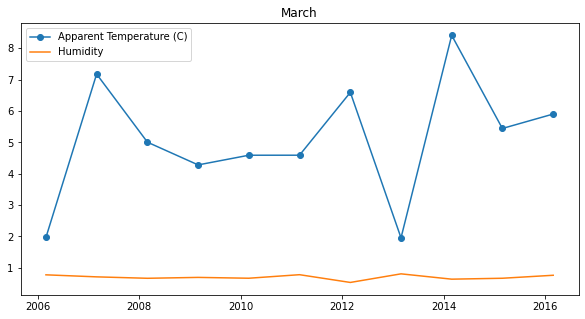

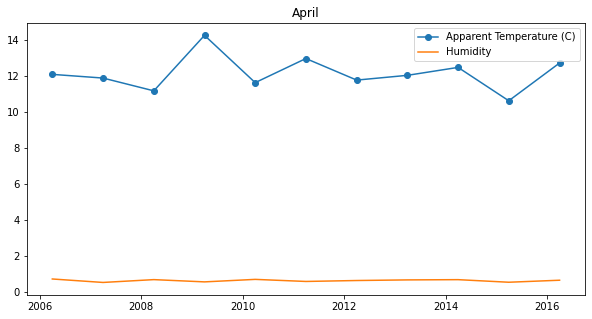

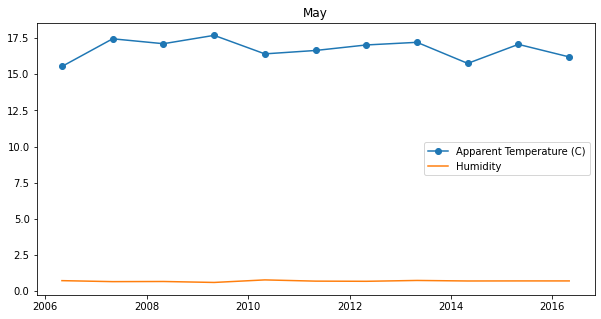

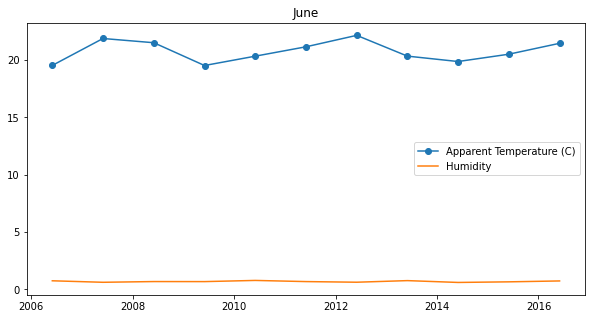

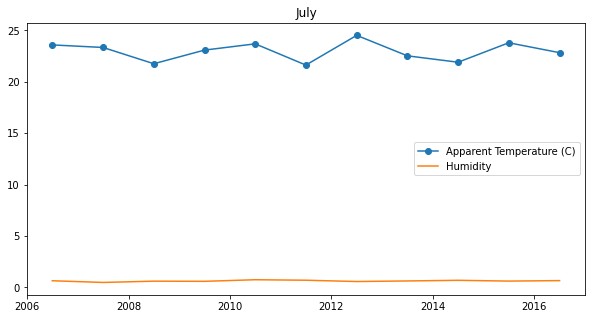

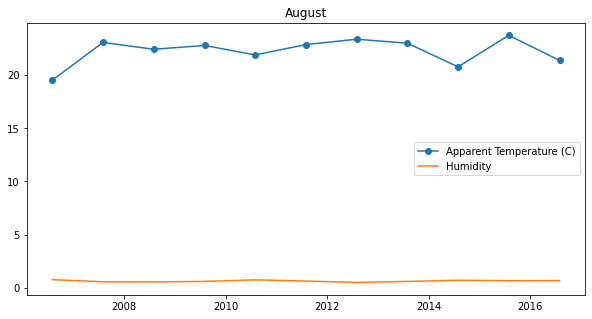

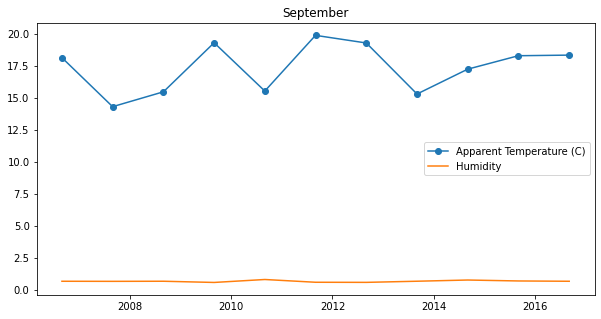

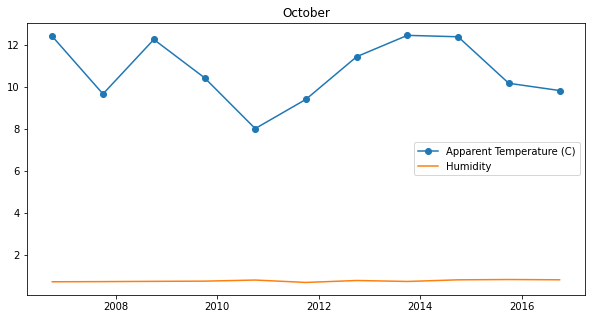

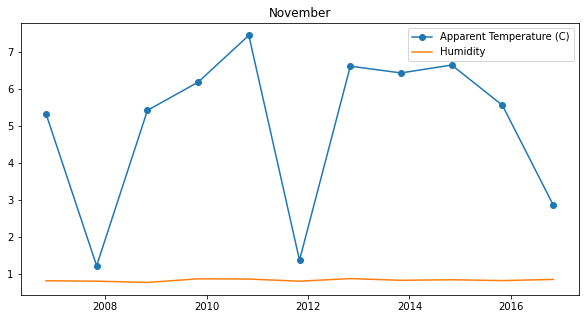

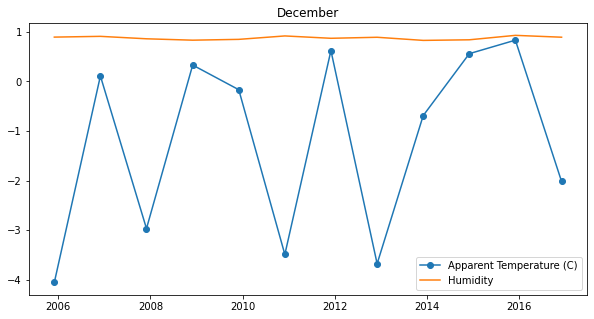

In [76]:
for i in range (1, 13):
  mon_data = new_data[new_data.index.month==i]
  plt.figure(figsize=(10, 5))
  plt.plot(mon_data['Apparent Temperature (C)'], label='Apparent Temperature (C)', marker='o')
  plt.plot(mon_data['Humidity'], label='Humidity')
  plt.title(mon_data.index[1].month_name())
  plt.legend(loc='best')
  plt.show()
  

## Conclusion

Global warming is no doubt an alarming call for the mankind or the livings being and therfore we should take an account of it into a deep consideration.
For determining its adverse affect we analysed the data and came out with some results.

After analysing the data throughlly we can clearly infer that the *humidity remains constant* throughout the period of 2006 to 2016. For analysing 
the variation in the apparent temperatue we need to do the monthly analysis. After performing the monthly we infer that *the apparent temperature varies very much sometimes it becomes very high sometime very low*.

Thus, it can safely be said that Global warming has as adverse affect in the apparent temperature not on humidity. 